Enter what you want to search for: 
['poster', 'person', 'laptop', 'monitor', 'screen', 'table', 'chair']

image 1/1 d:\Object Detection\Test_Images\test_image.jpg: 640x384 1 poster, 1 person, 2 laptops, 1 monitor, 1 table, 5 chairs, 82.5ms
Speed: 0.0ms preprocess, 82.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


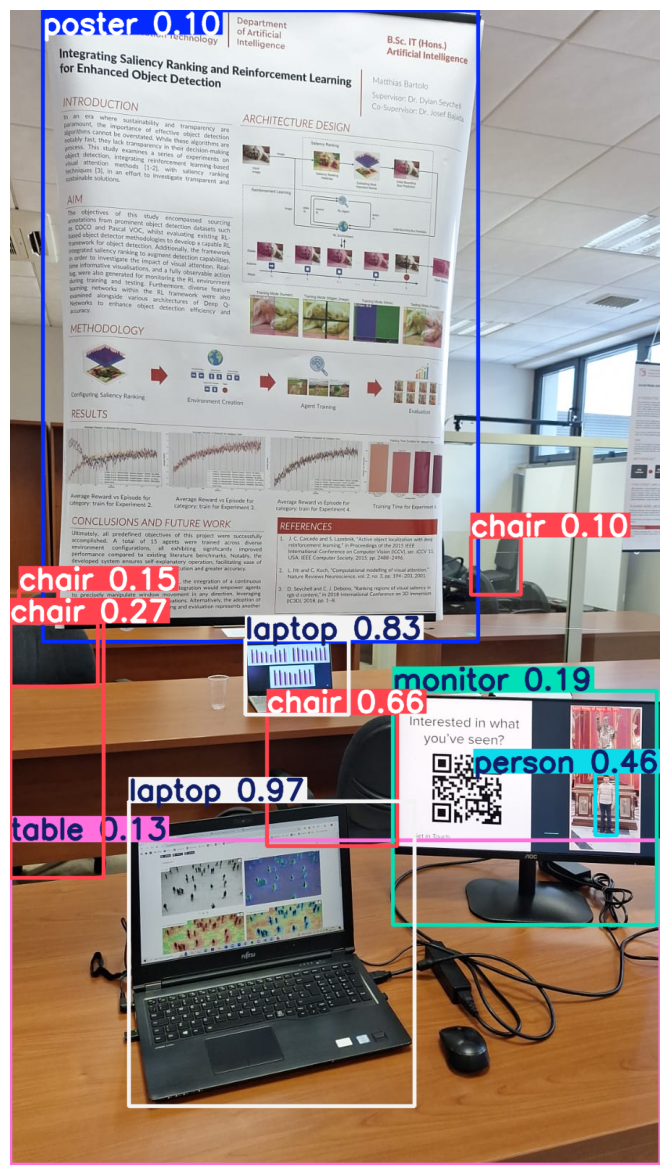

In [2]:
from PIL import Image
from ultralytics import YOLOWorld
import matplotlib.pyplot as plt

# Load the pre-trained model
model = YOLOWorld('yolov8s-worldv2.pt')

# Ask user input for prompt
print("Enter what you want to search for: ")
search_query = input()

# Tokenise the input
search = [s.strip() for s in search_query.split(',')]
print(search)

model.set_classes(search)

image_path = 'Test_Images/test_image.jpg'

# Set the confidence threshold
confidence_threshold = 0.1  # Example threshold, adjust as needed

# Perform inference with confidence threshold
results = model(image_path, conf=confidence_threshold)

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    
    # Display the image
    plt.figure(figsize=(15, 15))
    plt.imshow(im)
    plt.axis('off')
    plt.show()